In [1]:
%cd ../..

/home/nazif/thesis/mirscribe


In [2]:
import pandas as pd
import numpy as np
from scripts.utils import *
from scripts.globals import *
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV, train_test_split

pd.set_option('display.max_columns', None)

### close_proximity column is deactivated because its feature importance is close to zero

In [3]:
cols_to_keep = [
    "pred_energy",
    "pred_num_basepairs",
    "pred_seed_basepairs",
    "ta_log10",
    "sps_mean",
    "anchor_a",
    "6mer_seed",
    "match_8",
    "6mer_seed_1_mismatch",
    "compensatory_site",
    "supplementary_site",
    "supplementary_site_2",
    "empty_seed",
    "9_consecutive_match_anywhere",
    "mirna_conservation",
    "seed_8mer",
    "seed_7mer_a1",
    "seed_7mer_m8",
    "seed_compensatory",
    "seed_clash_2",
    "seed_clash_3",
    "seed_clash_4",
    "seed_clash_5",
    "mre_au_content",
    "local_au_content",
    # "another_mre_in_close_proximity",
    # "position_of_mre_in_transcript",
    "label"
]
df = pd.read_csv(f"{XGB_PIPELINE_DIR}/5_generate_features.csv", usecols=cols_to_keep)


# train test split

In [4]:
X = df.drop("label", axis=1)
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# fitting model

In [5]:
model = XGBClassifier()
model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [6]:
report_performance(model, X_test, y_test)

{'Accuracy': 0.9853297251103831,
 'Precision': 0.9855028692237995,
 'Recall': 0.9834237492465341,
 'F1-Score': 0.9844622114949464,
 'ROC AUC': 0.9852306431892947}

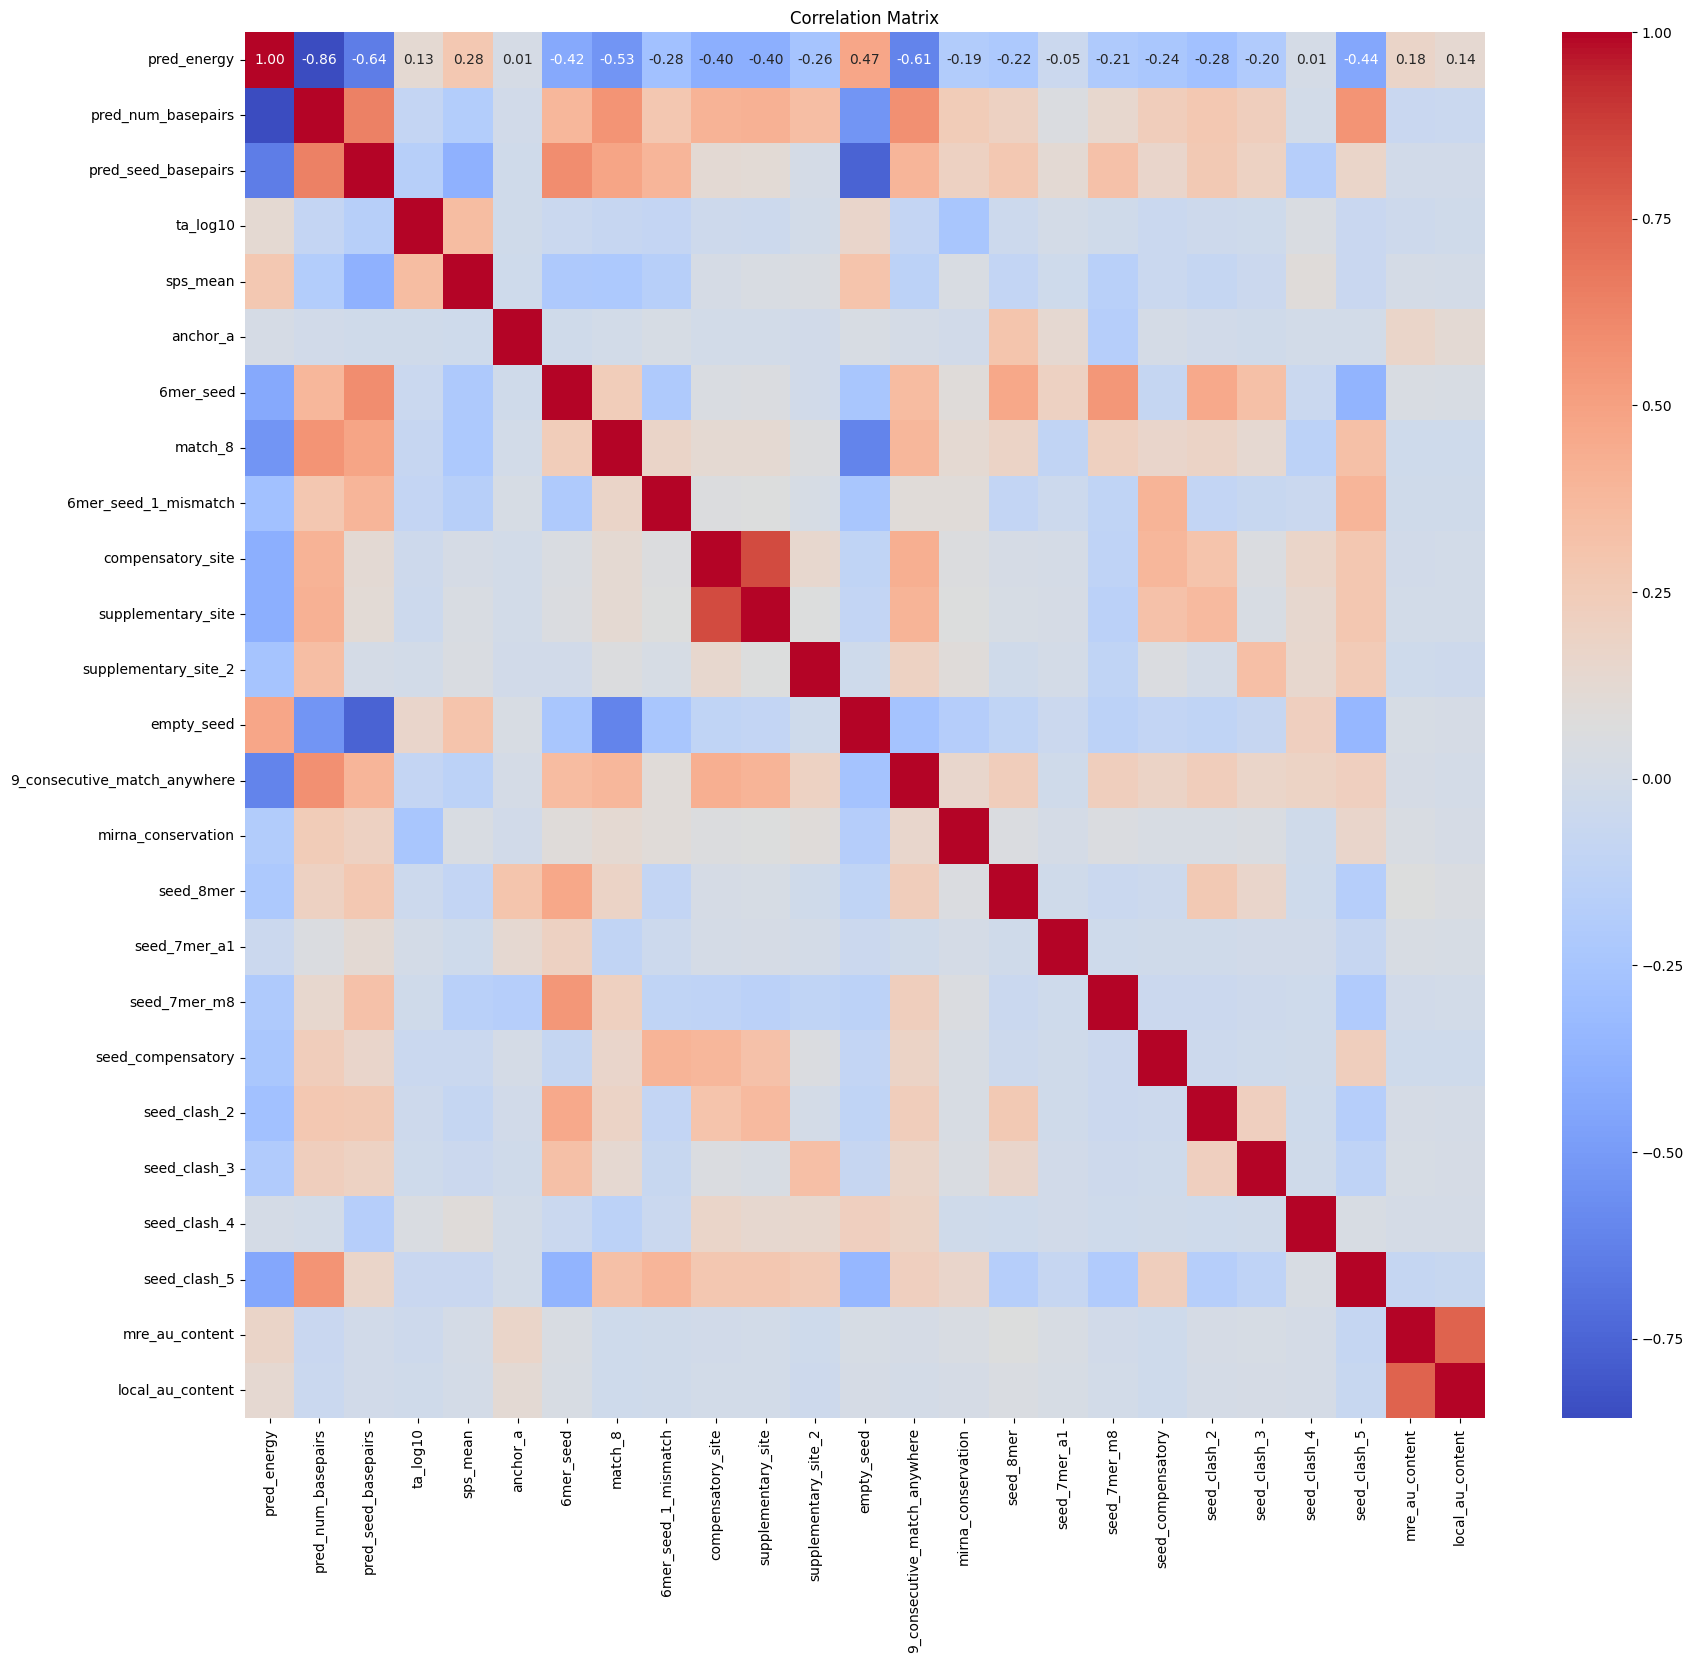

In [7]:
correlation_matrix = X.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Save the trained model
model.save_model('models/model_with_no_close_proximity.json')